# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# load Data

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")

# Data exploration

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2455,2456,15727490,Scott,661,France,Male,47,5,0.0,1,0,1,107243.31,1
4202,4203,15757588,Wright,526,France,Male,30,9,0.0,2,0,0,100995.68,0
3849,3850,15729836,Robinson,646,Spain,Male,32,1,0.0,2,1,0,183289.22,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.Exited.value_counts()

,count
Exited,
0,7963
1,2037


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.shape

(10000, 14)

# data analysis

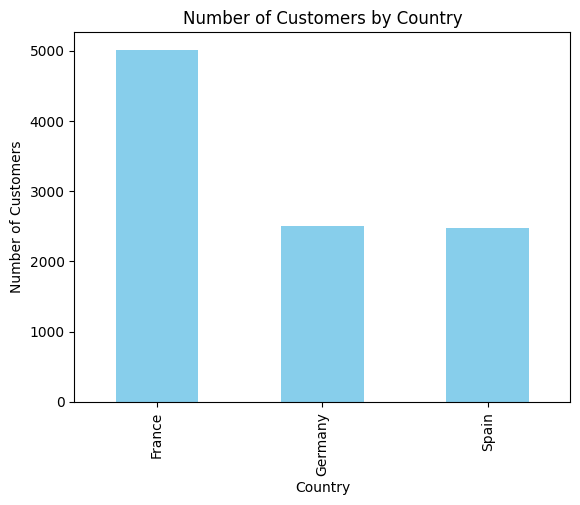

In [12]:
df['Geography'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()


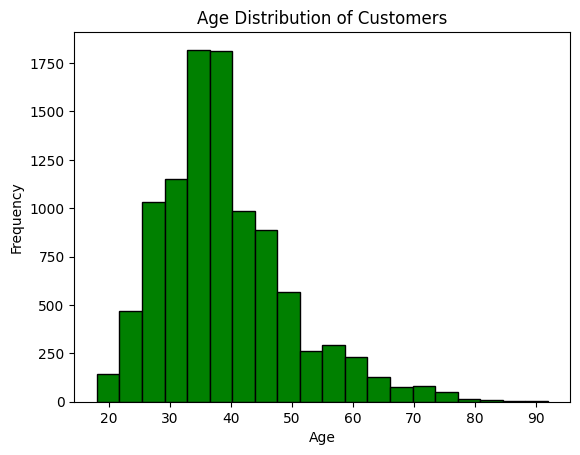

In [13]:
plt.hist(df['Age'], bins=20, color='green', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


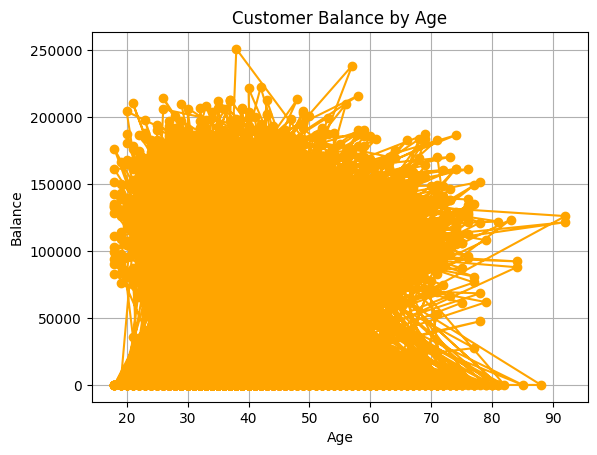

In [14]:
plt.plot(df['Age'], df['Balance'], linestyle='-', marker='o', color='orange')
plt.title('Customer Balance by Age')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.grid()
plt.show()


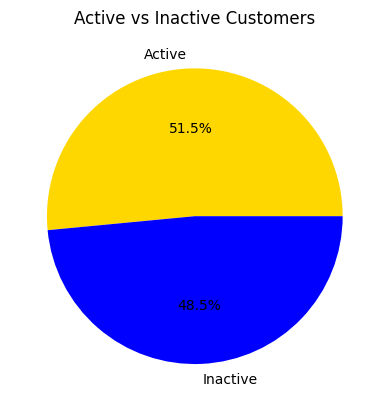

In [15]:
active_counts = df['IsActiveMember'].value_counts()
plt.pie(active_counts, labels=['Active', 'Inactive'], autopct='%1.1f%%', colors=['gold', 'blue'])
plt.title('Active vs Inactive Customers')
plt.show()


<ipython-input-16-00ae200e1e60>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Geography', y='Balance', data=df, palette='Set2')


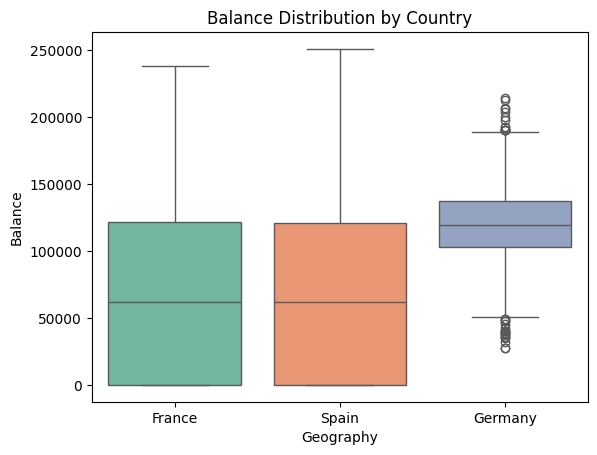

In [16]:
sns.boxplot(x='Geography', y='Balance', data=df, palette='Set2')
plt.title('Balance Distribution by Country')
plt.show()


<ipython-input-17-91c570b99bba>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['EstimatedSalary'], shade=True, color='purple')


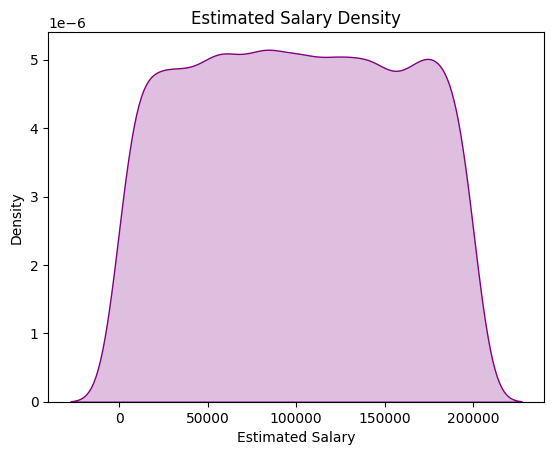

In [17]:
sns.kdeplot(df['EstimatedSalary'], shade=True, color='purple')
plt.title('Estimated Salary Density')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.show()


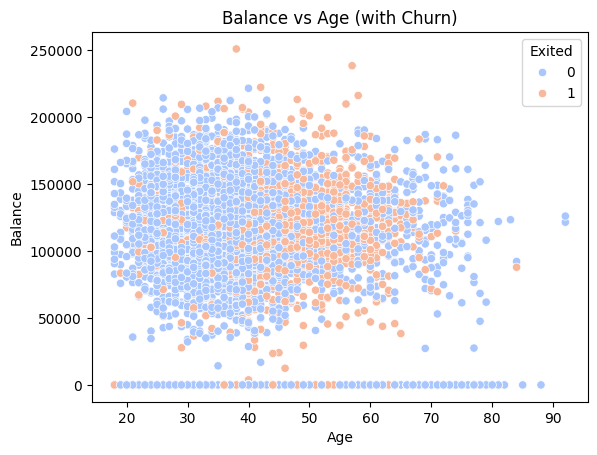

In [18]:
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df, palette='coolwarm')
plt.title('Balance vs Age (with Churn)')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


<ipython-input-19-6aa6885d34b7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Gender', y='NumOfProducts', data=df, jitter=True, palette='muted')


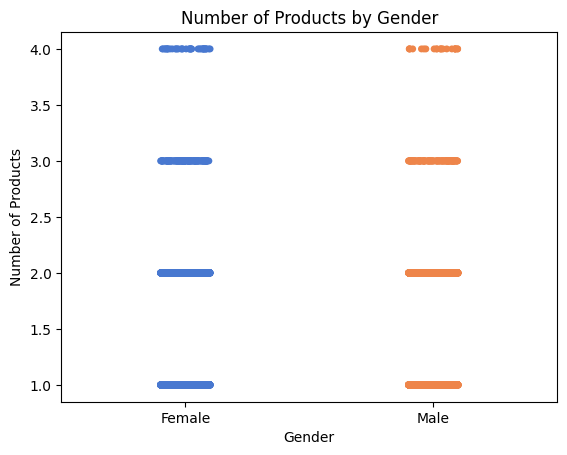

In [19]:
sns.stripplot(x='Gender', y='NumOfProducts', data=df, jitter=True, palette='muted')
plt.title('Number of Products by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Products')
plt.show()


# Preparing data for the model

In [20]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [22]:
from imblearn.over_sampling import SMOTE

x = df.drop('Exited', axis=1)
y = df['Exited']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,
                                      random_state=42, shuffle=True)

print(ytrain.value_counts())

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(xtrain, ytrain)

print(y_train_balanced.value_counts())

Exited
0    6356
1    1644
Name: count, dtype: int64
Exited
0    6356
1    6356
Name: count, dtype: int64


# Create model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

Train Accuracy: 0.8702013845185651
Test Accuracy: 0.829
Accuracy: 0.829
Confusion Matrix:
 [[1385  222]
 [ 120  273]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      1607
           1       0.55      0.69      0.61       393

    accuracy                           0.83      2000
   macro avg       0.74      0.78      0.75      2000
weighted avg       0.85      0.83      0.84      2000



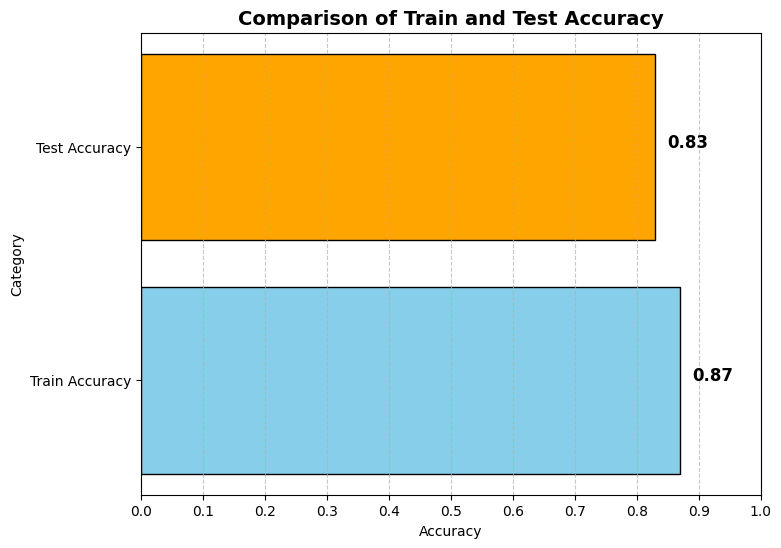

In [25]:
model = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=3,
    subsample=0.8
)

model.fit(x_train_balanced, y_train_balanced)

y_pred_train = model.predict(x_train_balanced)
y_pred_test = model.predict(xtest)

train_accuracy = accuracy_score(y_train_balanced, y_pred_train)
test_accuracy = accuracy_score(ytest, y_pred_test)

accuracy = accuracy_score(ytest, y_pred_test)
conf_matrix = confusion_matrix(ytest, y_pred_test)
class_report = classification_report(ytest, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


plt.figure(figsize=(8, 6))
plt.barh(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['skyblue', 'orange'], edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Category')
plt.title('Comparison of Train and Test Accuracy', fontsize=14, fontweight='bold')
plt.xticks(np.arange(0, 1.1, step=0.1))  # تقسيم المحور الأفقي لخطوات أكثر وضوحًا
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, v in enumerate([train_accuracy, test_accuracy]):
    plt.text(v + 0.02, i, f"{v:.2f}", color='black', fontsize=12, fontweight='bold')  # إضافة القيم بجانب الأعمدة
plt.show()
